
#### Soheil Dejnabadi
##### Wine Dataset
##### Analysis and Models



## Importing the data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve, roc_curve, auc, precision_recall_fscore_support, accuracy_score 

from sklearn.model_selection import train_test_split




In [87]:

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep = ';')
data.reset_index(inplace = True, drop = True)

data['class'] = [1 if i > 5 else 0 for i in data['quality']]
data['class'] = data['class'].astype('float64')
data.drop(columns = ['quality'], inplace = True)

print(data.info())

#already observed that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  class                 4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB
None


## Minimax 
Minimax to normalize dataset

In [88]:
X = data.drop(['class'], axis=1).copy()
y = data['class']


min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X))

Models
Used for cross validation

In [89]:
def cScores(test, pred):
    tp = tn = fp = fn = 0
    for i in range(len(test)):
        if pred[i] == 1 and test[i] == 1:
            tp = tp + 1
        elif pred[i] == 0 and test[i] == 0:
            tn = tn + 1
        elif pred[i] == 1 and test[i] == 0:
            fp = fp + 1
        else:
            fn = fn + 1
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    true_pos_rate = tp/(tp + fn)
    false_pos_rate = fp/(fp + tn)
    precision = tp/(tp + fp)
    f_score = 2*true_pos_rate*precision/(true_pos_rate + precision)
    return accuracy, true_pos_rate, false_pos_rate, precision, f_score 

## Logistic Regression
 
L2 penalties seems to outperform L1


Using 10 fold cross validation, and perform  ROC for each iteration

<ipython-input-90-25a9b7e32dce>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-90-25a9b7e32dce>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-90-25a9b7e32dce>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-90-25a9b7e32dce>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-90-25a9b7e32dce>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-90-25a9b7e32dce>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in

Average accuracy of logistic regression model is 0.7403


<ipython-input-90-25a9b7e32dce>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)


,Accuracy,True Positive Rate,False Positive Rate,Precision,F-Score
0,0.655102,0.749186,0.502732,0.714286,0.731320
1,0.740816,0.828660,0.426036,0.786982,0.807284
2,0.736735,0.841463,0.475309,0.781870,0.810573
3,0.748980,0.840764,0.414773,0.783383,0.811060
4,0.667347,0.837838,0.523810,0.642012,0.726968
5,0.765306,0.939683,0.548571,0.755102,0.837341
6,0.793878,0.949735,0.732143,0.814059,0.876679
7,0.806122,0.960000,0.578571,0.805755,0.876141
8,0.723926,0.854938,0.533333,0.758904,0.804064
9,0.764826,0.895028,0.606299,0.807980,0.849279


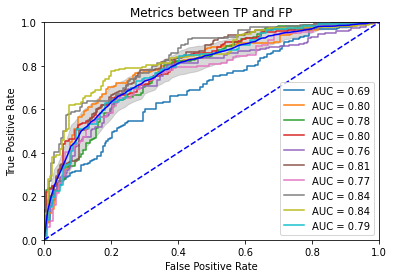

In [90]:
log_reg = LogisticRegression()
kf = KFold(n_splits=10)
kf.get_n_splits(X)
KFold(n_splits=10, random_state=None, shuffle=False)
log_reg_cfsn_matrix = pd.DataFrame(columns = ('Accuracy', 'True Positive Rate', 'False Positive Rate', 'Precision', 'F-Score'))

tprs = []
base_fpr = np.linspace(0, 1, 101)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    log_reg.fit(X_train, y_train)
    log_reg_pred = log_reg.predict(X_test)
    log_reg_prob = log_reg.predict_proba(X_test)
    
    y_test_temp = y_test.tolist()
    log_reg_cfsn_matrix.loc[len(log_reg_cfsn_matrix)] = cScores(y_test_temp, log_reg_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, log_reg_prob[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Metrics between TP and FP')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


print("Average accuracy of logistic regression model is %0.4f" % mean(log_reg_cfsn_matrix['Accuracy']))
log_reg_cfsn_matrix

## Support Vector Machine
The second model we choose is support vector machine.
Used rbf since it outperforms all other kernels
same metrics for 10 fold 

<ipython-input-91-6dc36a6423c1>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-91-6dc36a6423c1>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-91-6dc36a6423c1>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-91-6dc36a6423c1>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-91-6dc36a6423c1>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-91-6dc36a6423c1>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in

Average accuracy of support vector machine is 0.7577


<ipython-input-91-6dc36a6423c1>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)


,Accuracy,True Positive Rate,False Positive Rate,Precision,F-Score
0,0.671429,0.785016,0.519126,0.717262,0.749611
1,0.755102,0.819315,0.366864,0.809231,0.814241
2,0.773469,0.862805,0.407407,0.810888,0.836041
3,0.736735,0.818471,0.409091,0.781155,0.799378
4,0.681633,0.864865,0.523810,0.649275,0.741722
5,0.746939,0.898413,0.525714,0.754667,0.820290
6,0.787755,0.928571,0.687500,0.820093,0.870968
7,0.826531,0.960000,0.507143,0.825553,0.887715
8,0.785276,0.938272,0.515152,0.781491,0.852735
9,0.811861,0.917127,0.488189,0.842640,0.878307


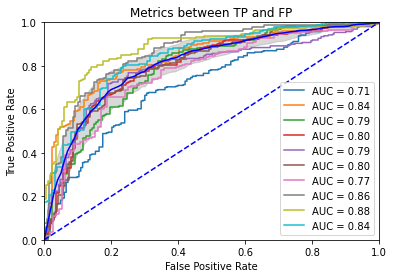

In [91]:
svc = svm.SVC(kernel = 'rbf', C = 1, tol = 0.0002, probability=True)

svc_cfsn_matrix = pd.DataFrame(columns = ('Accuracy', 'True Positive Rate', 'False Positive Rate', 'Precision', 'F-Score'))
tprs = []
base_fpr = np.linspace(0, 1, 101)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svc.fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    svc_prob = svc.predict_proba(X_test)
    
    y_test_temp = y_test.tolist()
    svc_cfsn_matrix.loc[len(svc_cfsn_matrix)] = cScores(y_test_temp, svc_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, svc_prob[:,1]) 
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
    
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Metrics between TP and FP')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


print("Average accuracy of support vector machine is %0.4f" % mean(svc_cfsn_matrix['Accuracy']))
svc_cfsn_matrix

## GridSearchCV


In [82]:
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

parameters = [{'C': [0.9,1,1.1,1.2,1.3], 'kernel': ['linear']},
              {'C': [0.9,1,1.1,1.2,1.3], 'kernel': ['rbf'], 'gamma': [0.7, 0.8, 0.9, 1.0]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs= -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

0.7451341043307087
{'C': 1.3, 'gamma': 1.0, 'kernel': 'rbf'}


# Decision Tree


Average accuracy of decision tree model is 0.6904


<ipython-input-83-0941baed4725>:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-83-0941baed4725>:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-83-0941baed4725>:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-83-0941baed4725>:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-83-0941baed4725>:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-83-0941baed4725>:20: DeprecationWarning: scipy.interp is deprecated and will be removed in

,Accuracy,True Positive Rate,False Positive Rate,Precision,F-Score
0,0.681250,0.574468,0.274336,0.465517,0.514286
1,0.681250,0.538462,0.182927,0.736842,0.622222
2,0.656250,0.714286,0.454545,0.750000,0.731707
3,0.706250,0.670330,0.246377,0.782051,0.721893
4,0.656250,0.518519,0.273585,0.491228,0.504505
5,0.718750,0.835052,0.460317,0.736364,0.782609
6,0.775000,0.854701,0.441860,0.840336,0.847458
7,0.681250,0.754717,0.462963,0.761905,0.758294
8,0.718750,0.706667,0.270588,0.697368,0.701987
9,0.628931,0.729412,0.486486,0.632653,0.677596


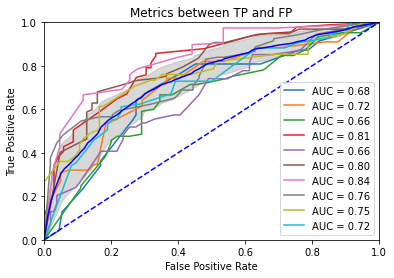

In [83]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.06, min_samples_leaf = 0.002)

clf_cfsn_matrix = pd.DataFrame(columns = ('Accuracy', 'True Positive Rate', 'False Positive Rate', 'Precision', 'F-Score'))
tprs = []
base_fpr = np.linspace(0, 1, 101)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    clf_prob = clf.predict_proba(X_test)
    
    y_test_temp = y_test.tolist()
    clf_cfsn_matrix.loc[len(clf_cfsn_matrix)] = cScores(y_test_temp, clf_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, clf_prob[:,1]) 
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Metrics between TP and FP')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


print("Average accuracy of decision tree model is %0.4f" % mean(clf_cfsn_matrix['Accuracy']))
clf_cfsn_matrix

# Random Forest


<ipython-input-84-53e525f20b9b>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-84-53e525f20b9b>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-84-53e525f20b9b>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-84-53e525f20b9b>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-84-53e525f20b9b>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-84-53e525f20b9b>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in

Average accuracy of random forest model is 0.7348


<ipython-input-84-53e525f20b9b>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)


,Accuracy,True Positive Rate,False Positive Rate,Precision,F-Score
0,0.706250,0.468085,0.194690,0.500000,0.483516
1,0.700000,0.538462,0.146341,0.777778,0.636364
2,0.756250,0.790476,0.309091,0.830000,0.809756
3,0.731250,0.736264,0.275362,0.779070,0.757062
4,0.687500,0.425926,0.179245,0.547619,0.479167
5,0.750000,0.886598,0.460317,0.747826,0.811321
6,0.800000,0.846154,0.325581,0.876106,0.860870
7,0.768750,0.811321,0.314815,0.834951,0.822967
8,0.737500,0.693333,0.223529,0.732394,0.712329
9,0.710692,0.752941,0.337838,0.719101,0.735632


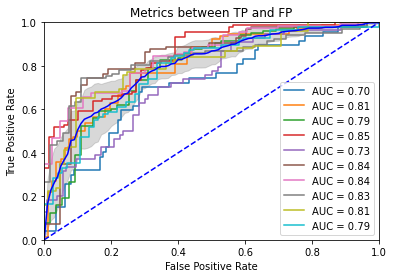

In [84]:
r_forest = RandomForestClassifier(n_estimators=100, criterion = 'gini', 
                                  max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)

forest_cfsn_matrix = pd.DataFrame(columns = ('Accuracy', 'True Positive Rate', 'False Positive Rate', 'Precision', 'F-Score'))
tprs = []
base_fpr = np.linspace(0, 1, 101)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    r_forest.fit(X_train, y_train)
    r_forest_pred = r_forest.predict(X_test)
    r_forest_prob = r_forest.predict_proba(X_test)
    
    y_test_temp = y_test.tolist()
    forest_cfsn_matrix.loc[len(forest_cfsn_matrix)] = cScores(y_test_temp, r_forest_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, r_forest_prob[:,1]) 
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Metrics between TP and FP')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


print("Average accuracy of random forest model is %0.4f" % mean(forest_cfsn_matrix['Accuracy']))
forest_cfsn_matrix

#  Model Evaluation


In [85]:
evaluation = pd.concat([log_reg_cfsn_matrix.mean(axis=0), 
                          svc_cfsn_matrix.mean(axis=0), clf_cfsn_matrix.mean(axis=0), 
                          forest_cfsn_matrix.mean(axis=0)], axis = 1)
evaluation.reset_index(inplace = True, drop = True)
evaluation.columns = ['Logistic Regression', 'SVM','Decision Tree', 'Random Forest']
evaluation.index = ['Accuracy', 'True Positive Rate', 'False Positive Rate', 'Precision', 'F-Score']
evaluation

,Logistic Regression,SVM,Decision Tree,Random Forest
Accuracy,0.736069,0.747319,0.690393,0.734819
True Positive Rate,0.704660,0.699412,0.689661,0.694956
False Positive Rate,0.279973,0.261182,0.355399,0.276681
Precision,0.733057,0.752768,0.689426,0.734485
F-Score,0.713327,0.721052,0.686256,0.710898


# Prediction
Use Random Forest model to make prediction on our test dataset since that gives us the best results compared to the others

,Accuracy,True Positive Rate,False Positive Rate,Precision,F-Score
0,0.779167,0.784,0.226087,0.790323,0.787149


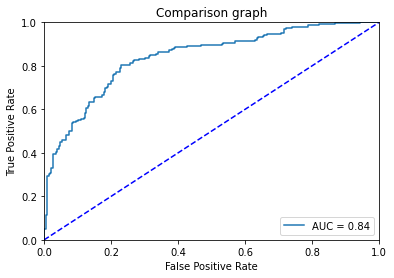

In [86]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)
r_forest = RandomForestClassifier(n_estimators=100, criterion = 'gini', 
                                  max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
test_matrix = pd.DataFrame(columns = ('Accuracy', 'True Positive Rate', 'False Positive Rate', 'Precision', 'F-Score'))
r_forest.fit(X_train, y_train)
r_forest_pred = r_forest.predict(X_test)
r_forest_prob = r_forest.predict_proba(X_test)
    
y_test_temp = y_test.tolist()
test_matrix.loc[len(test_matrix)] = cScores(y_test_temp, r_forest_pred)
    
fpr, tpr, thresholds = roc_curve(y_test, r_forest_prob[:,1]) 
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Comparison graph')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
test_matrix